# The Exercises from http://www1.phys.vt.edu/quasar/projectsPage.php?id=2

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Exercise 13
### Carbon IV Doublet Gaussian Troughs With Velocity Dependent Gaussian Coverage
<!-- <font size=5> -->
step 1: Download the data from the link above These data are presented in a text file with three columns, velocity in km s-1 and normalized intensity for the red and blue doublet members, respectively.
    
Step 2: Plot the Normalized Intensity vs. Velocity Plot both the red ($I_R$) and blue ($I_B$) lines of the doublet in their corresponding colors. Plot the scaled red doublet line ($I_R^2$, see tutorial 4 for instructions) to demonstrate that apparent optical depth does not work for this example (refer to exercise 8 for instructions). Also, as with previous examples, the user should determine the full width at half maximum of the troughs as well as the full range of velocity of the troughs and their central velocities (i.e., the radial velocity offset).

Step 3: Calculate the apparent optical depth and plot as a function of velocity Convert the normalized flux to apparent optical depth via $\tau(v)=-ln(I(v))$ for each of the lines and plot τ as a function of velocity. Determine the maximum value of τ for each line.

Step 4: Calculate the covering factor and the real optical depth and plot as a function of velocity Use the covering fraction as a function of velocity for the gas (derived in exercise 7), which is the so-called doublet equation:
    
$$C(v)=(I_R^2(v)-2I_R(v)+1)/(I_B(v)-2I_R(v)+1)$$
    
where IR and IB are the residual intensities for the λ1548.20 lines, respectively. Given the covering, calculate and plot the real optical depth using $\tau(v)$ as derived earlier:

$$\tau(v)= -ln[(I_R(v)-I_B(v))/(1-I_R(v))]$$

Step 5: Create an $N_{CIV}$ ($C_{IV}$ ionic column density) plot from the optical depth solution. Convert both the apparent optical depth derived from the red member and the real optical depth to column density via the equation: $N(v)=C(v)*(3.8*10^{14} f\lambda) \tau(v) cm^{-2}$, where $f$ is the oscillator strength with values of 0.189 and 0.095, λ is the wavelength of 1548.20 and 1550.77 for the blue and red $C IV$ lines, respectively, and $C(v)$ is the covering factor derived for the partial covering models. In the case of the partial covering model, this column density is the average column density covering the background source. Plot the apparent optical depth separately from the real optical depth as a function of velocity.

Step 6: Calculate the total $N_{CIV}$ in the the absorber. To determine the full column density of $CIV$ integrate over velocity. First however, to obtain the averaged value of the column density in the line of sight to the background source, multiply the optical depth at every velocity by the covering factor (which should be dependent on velocity in this example). Compare the column density derived using the real optical depth against the column density determined by the apparent optical depth.

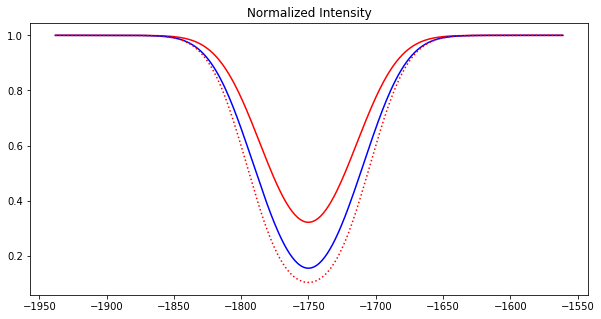

In [2]:
data = pd.read_table('tut13.txt',sep='     |      ',engine='python')
data = array(data)
v = data[:,0]
Ir = data[:,1]
Ib = data[:,2]
fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v,Ir,'r')
ax.plot(v,Ib,'b')
ax.plot(v,Ir**2,'r:')
ax.set_title('Normalized Intensity')
show()

1.6429112591136357


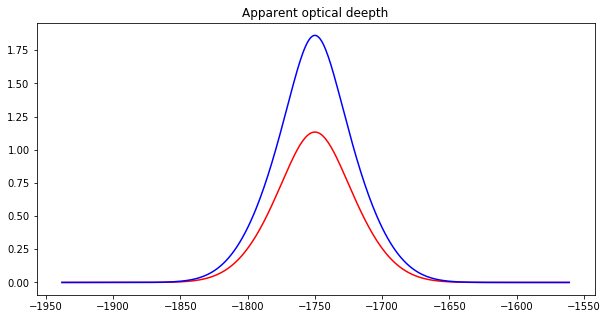

In [3]:
tau_r = -log(Ir)
tau_b = -log(Ib)
fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v,tau_r,'r')
ax.plot(v,tau_b,'b')
ax.set_title('Apparent optical deepth')
print(max(tau_b)/max(tau_r))
show()

In [4]:
C = (Ib**2-2*Ib+1)/(Ir-2*Ib+1)
C[isnan(C)] = 0
C[isnan(C)] = 0

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [5]:
tau_real=-log((Ir-Ib)/(1-Ir))
tau_real[isnan(tau_real)]=+0
tau_real[isinf(tau_real)]=+0

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


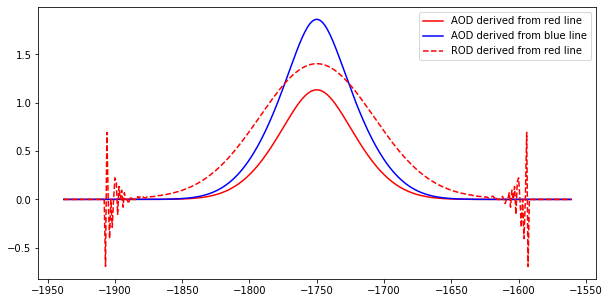

In [6]:
fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v,tau_r,'r',label = 'AOD derived from red line')
ax.plot(v,tau_b,'b',label='AOD derived from blue line')
ax.plot(v,tau_real,'r--',label='ROD derived from red line')
ax.legend()
show()

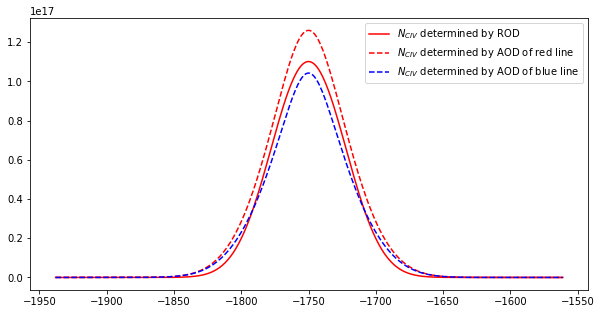

In [7]:
f_r = 0.189
f_b = 0.095
l_r = 1548.20
l_b = 1550.77
N_real = C*(3.8*10**14*f_r*l_r)*tau_real
N_real[isnan(N_real)]=+0
N_real[isinf(N_real)]=+0
N_apparent_r = (3.8*10**14*f_r*l_r)*tau_r
N_apparent_b = (3.8*10**14*f_b*l_b)*tau_b
fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v,N_real,'r', label = r'$N_{C IV}$ determined by ROD')
ax.plot(v,N_apparent_r,'r--', label = r'$N_{C IV}$ determined by AOD of red line')
ax.plot(v,N_apparent_b,'b--', label = r'$N_{C IV}$ determined by AOD of blue line')
ax.legend()
show()

In [8]:
s = 0
d = v[1]-v[0]
# Use Simpson Integration
for i in range(len(v)-2):
    s = s+N_real[i]*d/6+N_real[i+1]*2*d/3+N_real[i+2]*d/6
print('Column density calculated with ROD is',s)

s = 0
for i in range(len(v)-2):
    s = s+N_apparent_r[i]*d/6+N_apparent_r[i+1]*2*d/3+N_apparent_r[i+2]*d/6
print('Column density calculated with AOD of red line is',s)

s = 0
for i in range(len(v)-2):
    s = s+N_apparent_b[i]*d/6+N_apparent_b[i+1]*2*d/3+N_apparent_b[i+2]*d/6
print('Column density calculated with AOD of blue line is',s)

Column density calculated with ROD is 7.485641007174259e+18
Column density calculated with AOD of red line is 8.993331365881515e+18
Column density calculated with AOD of blue line is 7.245794800136379e+18


## Exercise 20
### C IV Doublet Gaussian Trough With Complete Coverage
Step 1: Download the data from the link above. These data are presented in a text file with two columns, wavelength in Å and normalized intensity.

Step 2: Plot the Normalized Intensity vs. Wavelength. Note that the minimum intensity does not fall on the wavelength of a given transition, due to the effects of the radial velocity.

Step 3: Convert the rest wavelengths into velocity. Using the wavelengths of C IV (1548.20 Å and 1550.770 Å) and the relativistic Doppler shift formula $v=c*(\lambda^2-\lambda_0^2)/(\lambda^2+\lambda_0^2)$, convert the wavelengths into radial velocity. Since there are multiple lines for the ion, the user should get a normalized intensity as a function of velocity for each separate line. Since there will be an offset between the two velocity vectors, use a procedure such as linterp so that the flux arrays match up. <font color=red>(我没明白'use a procedure such as linterp so that the flux arrays match up' 这个过程是什么意思，我后面算的时候只保留了速度重合的部分，我感觉可能有问题)</font>

Step 4: Plot the Normalized Intensity vs. Velocity. Plot both the red $(I_R)$ and blue $(I_B)$ lines of the doublet in their corresponding colors as well as IR2 in dashed red. Determine the widths of the troughs as well as their central velocities (i.e., the radial velocity offset).

Step 5: Calculate the apparent optical depth and plot it as a function of velocity. Convert the normalized flux to apparent optical depth (AOD) via $\tau(v)=-ln(I(v))$ and plot τ as a function of velocity. The user should determine the maximum value of τ in the trough. The ratio of maximum τ for the lines should be equal to two.

Step 6: Create an NCIV plot from the optical depth solution. Convert the optical depth to column density via the equation: $N(v)=(3.8*10^{14} f \lambda) \tau(v) cm^{-2}$, where f is the oscillator strength with values of 0.189 and 0.095 and λ is the wavelength of 1548.20 and 1550.77 for the blue and red $CIV$ lines, respectively. Plot this as a function of velocity.

Step 7: Calculate the total $N_{CIV}$ in the the absorber. To determine the full column density of CIV integrate over velocity. For both lines, the column densities should be equal.



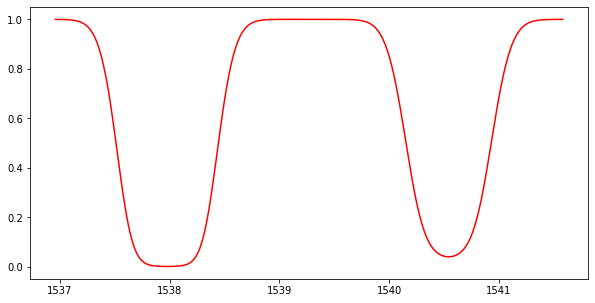

In [9]:
data = pd.read_table('tut20.txt',sep='     |   ',engine='python')
data = array(data)
lam = data[:,0]
I = data[:,1]

fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(lam,I,'r')

In [10]:
lam_01 = 1548.2
lam_02 = 1550.77
c = 299792.458
v_1 = c*(lam_01**2-lam**2)/(lam_01**2+lam**2)
v_2 = c*(lam_02**2-lam**2)/(lam_02**2+lam**2)

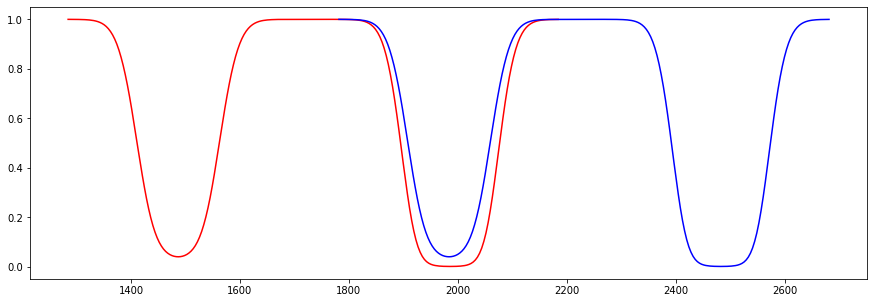

In [11]:
fig = figure(figsize = (15,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v_1,I,'r')
ax.plot(v_2,I,'b')
# ax.plot(v_2,I**2,'g')

In [12]:
print(max(v_1),'\n',min(v_2))

2184.4069688974478 
 1781.8606280366105


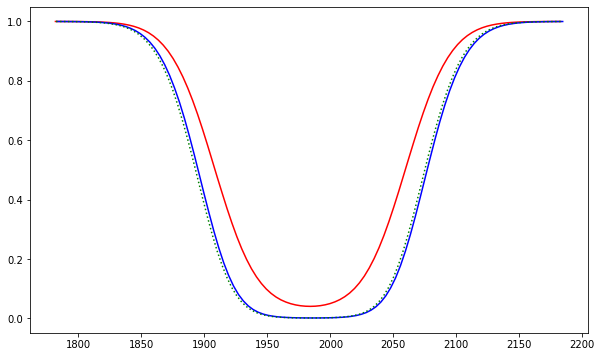

In [13]:
v2 = delete(v_1,where(v_1<min(v_2)))
I2 = delete(I,where(v_1<min(v_2)))
v1 = delete(v_2,where(v_2>max(v_1)))
I1 = delete(I,where(v_2>max(v_1)))
fig = figure(figsize = (10,6))
ax=fig.add_subplot(1,1,1)
ax.plot(v1,I1,'r')
ax.plot(v2,I2,'b')
ax.plot(v1,I1**2,'g:')
show()

In [14]:
a = len(I1)//2
b = len(I2)//2

index1_1 =where(abs(I1[:a]-(max(I1)+min(I1))/2)==min(abs(I1[:a]-(max(I1)+min(I1))/2)))
index1_2 = where(abs(I1[a:]-(max(I1)+min(I1))/2)==min(abs(I1[a:]-(max(I1)+min(I1))/2)))

index2_1 =where(abs(I2[:b]-(max(I2)+min(I2))/2)==min(abs(I2[:b]-(max(I2)+min(I2))/2)))
index2_2 = where(abs(I2[b:]-(max(I2)+min(I2))/2)==min(abs(I2[b:]-(max(I2)+min(I2))/2)))

In [15]:
v1_right = v1[index1_1]
v1_left = v1[index1_2[0]+a]
width1 = v1_right-v1_left
print(width1)
v2_right = v2[index2_1]
v2_left = v2[index2_2[0]+b]
width2 = v2_right-v2_left
print(width2)

[155.67493252]
[179.32415445]


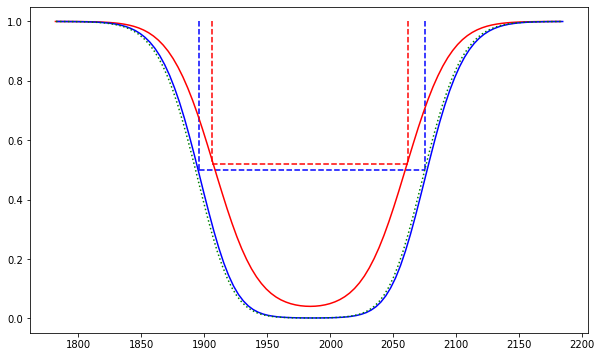

In [16]:
fig = figure(figsize = (10,6))
ax=fig.add_subplot(1,1,1)
ax.plot(v1,I1,'r')
ax.plot(v2,I2,'b')
ax.plot(v1,I1**2,'g:')
ax.vlines(v1_left,1,(max(I1)+min(I1))/2,'r','--')
ax.vlines(v1_right,1,(max(I1)+min(I1))/2,'r','--')
ax.hlines((max(I1)+min(I1))/2,v1_left,v1_right,'r','--')

ax.vlines(v2_left,1,(max(I2)+min(I2))/2,'b','--')
ax.vlines(v2_right,1,(max(I2)+min(I2))/2,'b','--')
ax.hlines((max(I2)+min(I2))/2,v2_left,v2_right,'b','--')

show()

1.9918226039241695


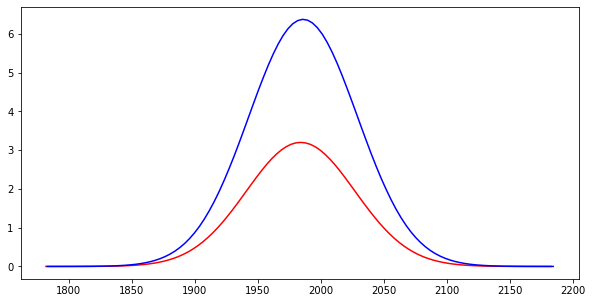

In [17]:
tau_1 = -log(I1)
tau_2 = -log(I2)
fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v1,tau_1,'r')
ax.plot(v2,tau_2,'b')
print(max(tau_2)/max(tau_1))
show()

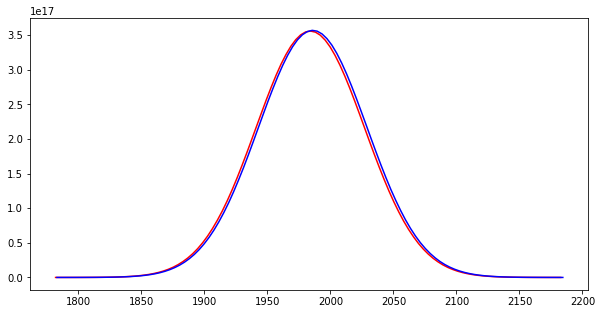

In [18]:
f_r = 0.189
f_b = 0.095
l_r = 1548.20
l_b = 1550.77
N_1 = (3.8*10**14*f_r*l_r)*tau_1
N_2 = (3.8*10**14*f_b*l_b)*tau_2
fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v1,N_1,'r')
ax.plot(v2,N_2,'b')

In [19]:
s = 0
d = v1[0]-v1[1]
for i in range(len(v1)-2):
    s = s+N_1[i]*d/6+N_1[i+1]*2*d/3+N_1[i+2]*d/6
print('Column density calculated with line 1 is',s)

s = 0
d = v2[0]-v2[1]
for i in range(len(v2)-2):
    s = s+N_2[i]*d/6+N_2[i+1]*2*d/3+N_2[i+2]*d/6
print('Column density calculated with line 2 is',s)

Column density calculated with line 1 is 3.849616686913076e+19
Column density calculated with line 2 is 3.860668992809934e+19


## Exercise 48
<!-- <font size=5> -->
Step 1: Download the data from the link above. These data are presented in a text file with three columns, wavelength in Å, normalized intensity, and average error.

Step 2: Plot the Normalized Intensity vs. Wavelength. Note that the minimum intensity does not fall on the wavelength of a given transition, due to the effects of the radial velocity. Also plot the error on the same graph. The error should increase with the square root of the intensity.

Step 3: Convert the rest wavelengths into velocity. Using the wavelength of C IV (1548.20 Å and 1550.77 Å) and the relativistic Doppler shift formula $v=c*(\lambda^2-\lambda_0^2)/(\lambda^2+\lambda_0^2)$, convert the wavelengths into radial velocity. Since there are multiple emission wavelengths, the user should get multiple values for normalised intensity at each velocity, one for each emission wavelength. Since there will be an offset between the two velocity vectors, use a procedure such as linterp so that the flux arrays match up.

Step 4: Determine the emission curves and factor them out from the intensity function. The normalised intensity is multiplied by $(1+\sum E(v))$, where E(v) is an emission line. Therefore, one can take the intensity at two points along the emission line and use it to determine the correct formula. However, due to the presence of the noise, the exact intensity cannot be found, so the intensity will have to be averaged over several points if an accurate reading is desired. In order to accurately determine the equations, the broader emissions should be done first. The emission can then be factored out of the flux, leaving just the normalised intensity. Also note that the ratio of the strengths of the narrow emission lines is the ratio of the wavelength times the oscillator strength.

Step 5: Plot the Normalized Intensity vs. Velocity. Plot both the red $(I_R)$ and blue $(I_B)$ lines of the doublet in their corresponding colors as well as IR2 in dashed red. Use the error vector to create error bars for both lines. Determine the widths of the troughs as well as the central velocities (i.e., the radial velocity offset).

Step 6: Calculate the apparent optical depth and plot it as a function of velocity. Convert the normalized flux to apparent optical depth (AOD) via τ(v)=-ln(I(v)) and plot τ as a function of velocity. The user should determine the maximum value of τ in the trough. The ratio of maximum τ for the lines should not be equal to two.

Step 7: Calculate the covering factor and the real optical depth and plot as functions of velocity. Calculate the covering fractions as functions of velocity for the C IV ion, which can be solved in the method outlined in Tutorial 7. In addition, using the formulae $\sigma_\tau = \sqrt{\sigma_{I_b}^2*(\partial \tau/\partial I_b)^2 + \sigma I_r^2*(\partial \tau /\partial I_r)^2}$ and $\sigma_C = \sqrt{\sigma_{I_b}^2*(\partial C / \partial I_b)^2 + \sigma I_r^2*(\partial C/\partial Ir)^2}$, determine the error in coverage and optical depth and plot as error bars.

Step 8: Create an NCIV plot from the optical depth solution. Convert the optical depth to column density via the equation: N(v)=(3.8x1014 / fλ) τ(v) cm-2, where f is the oscillator strength (.189 and .095) and λ is the wavelength (1548.20 Å and 1550.77 Å). Plot this as a function of velocity, again with error bars.

Step 9: Use AOD to estimate the column density where the partial covering method fails. Using the red line, derive the column density using AOD. This will provide only a minimum value of the column density, however.

Step 10: Calculate the total NCIV in the the absorber. To determine the full column density of CIV integrate over velocity. To find the total error, use the formula $\sigma_{tot} = \sqrt{\int \sigma_2}$.

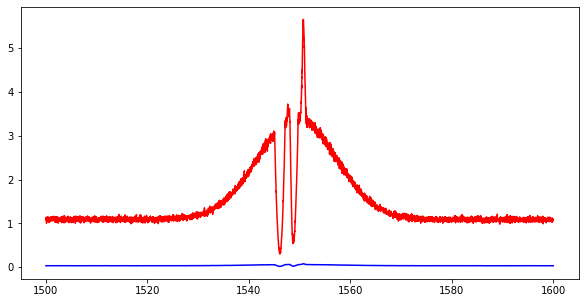

In [20]:
data = pd.read_table('tut48.txt',sep='    |      |     ',engine='python')
data = array(data)
wave = data[:,0]
I = data[:,1]
err = data[:,2]
fig = figure(figsize = (10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(wave,I,'r')
ax.plot(wave,err,'b')
show()

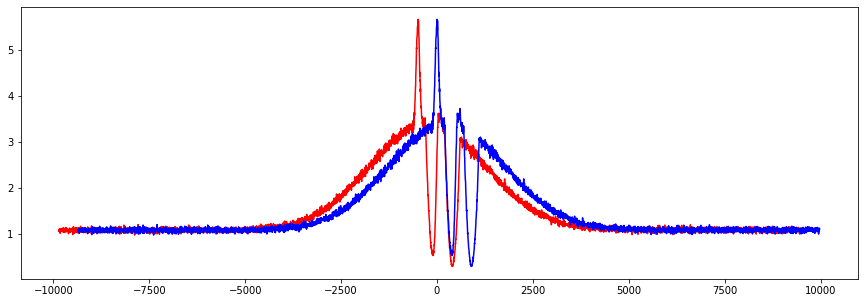

In [21]:
wave_01 = 1548.2
wave_02 = 1550.77
c = 299792.458
v_r = c*(wave_01**2-wave**2)/(wave_01**2+wave**2)
v_b = c*(wave_02**2-wave**2)/(wave_02**2+wave**2)

fig = figure(figsize = (15,5))
ax=fig.add_subplot(1,1,1)
ax.plot(v_r,I,'r')
ax.plot(v_b,I,'b')

后面我不知道怎么处理两个不同的速度，怎么把发射线消掉我也没看得明白